# 상품군 : 이미용

In [1]:
import pandas as pd 
import numpy as np 
import os 

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

In [2]:
from timeseries_graph_functions import *  # 시각화용 함수 만든것 불러오기 

In [3]:
# from timeseries_graph_functions import sales_by_yoill

In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)    #과학적 표기법 안쓸래 
mpl.rcParams['axes.unicode_minus'] = False               # 마이너스 표기 오류 방지 

In [5]:
# 한글 폰트 깨짐 방지 
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()   
rc('font', family=font_name)
# plt.rcParams['font.family'] = 'Malgun Gothic'

In [6]:
base_dir = "C:\\programming\\bigcontest_2020\\champion_league\\preprocess\\saejin"
excel_file = "원데이터 전처리.xlsx"

excel_dir = os.path.join(base_dir,excel_file)

In [7]:
raw_data = pd.read_excel(excel_dir, 
                             sheet_name = "Sheet1",
                             header = 0)

In [8]:
raw_data

,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,...,월,일,요일,분기,365일,계절,방송시간,매진여부,취급액boxcox,최소판매수량
0,1,2019-01-01 06:00:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,109.82,53
1,2,2019-01-01 06:00:00,20.00,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,130.05,110
2,3,2019-01-01 06:20:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,121.58,82
3,4,2019-01-01 06:20:00,20.00,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,144.68,174
4,5,2019-01-01 06:40:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,143.31,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35370,38296,2019-12-31 23:20:00,20.00,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,104.07,11
35371,38297,2019-12-31 23:40:00,20.00,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,154.06,51
35372,38298,2019-12-31 23:40:00,20.00,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,173.20,91
35373,38299,2019-12-31 23:40:00,20.00,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,112.48,15


# 상품군 : 이미용


In [9]:
beauty_raw = raw_data[raw_data['상품군'] == '이미용']

In [10]:
focus_data = beauty_raw

In [11]:
focus_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 35 to 35264
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  1305 non-null   int64         
 1   방송일시        1305 non-null   datetime64[ns]
 2   노출(분)       1305 non-null   float64       
 3   마더코드        1305 non-null   int64         
 4   상품코드        1305 non-null   int64         
 5   상품명         1305 non-null   object        
 6   상품군         1305 non-null   object        
 7   판매단가        1305 non-null   int64         
 8   취급액         1305 non-null   int64         
 9   날짜          1305 non-null   int64         
 10  시간          1305 non-null   object        
 11  월           1305 non-null   int64         
 12  일           1305 non-null   int64         
 13  요일          1305 non-null   object        
 14  분기          1305 non-null   object        
 15  365일        1305 non-null   int64         
 16  계절          1305 non-n

In [12]:
focus_data

,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,...,월,일,요일,분기,365일,계절,방송시간,매진여부,취급액boxcox,최소판매수량
35,36,2019-01-01 17:00:00,20.00,100074,200197,비버리힐스폴로클럽 남성기초세트(2018FW골드),이미용,39800,42239000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,218.25,1061
36,37,2019-01-01 17:20:00,20.00,100074,200197,비버리힐스폴로클럽 남성기초세트(2018FW골드),이미용,39800,73494000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,247.42,1847
37,38,2019-01-01 17:40:00,20.00,100074,200197,비버리힐스폴로클럽 남성기초세트(2018FW골드),이미용,39800,107103000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,269.41,2691
174,181,2019-01-03 08:00:00,20.00,100774,202261,엘렌실라 달팽이크림(콜라겐5+팩트3),이미용,79000,13665000,20190103,...,1,3,목요일,Q1,3,겨울,20.00,0,168.84,173
175,182,2019-01-03 08:20:00,20.00,100774,202261,엘렌실라 달팽이크림(콜라겐5+팩트3),이미용,79000,26788000,20190103,...,1,3,목요일,Q1,3,겨울,20.00,0,196.81,339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35242,38163,2019-12-30 12:40:00,20.00,100262,200876,더블모 어성초 샴푸,이미용,59800,30608000,20191230,...,12,30,월요일,Q4,364,겨울,20.00,0,202.86,512
35243,38164,2019-12-30 13:00:00,20.00,100262,200876,더블모 어성초 샴푸,이미용,59800,53553000,20191230,...,12,30,월요일,Q4,364,겨울,20.00,0,230.31,896
35262,38184,2019-12-30 20:20:00,20.00,100074,200199,비버리힐스폴로클럽 남성기초세트(골드+콜라겐),이미용,39800,51010000,20191230,...,12,30,월요일,Q4,364,겨울,20.00,0,227.79,1282
35263,38185,2019-12-30 20:40:00,20.00,100074,200199,비버리힐스폴로클럽 남성기초세트(골드+콜라겐),이미용,39800,73150000,20191230,...,12,30,월요일,Q4,364,겨울,20.00,0,247.16,1838


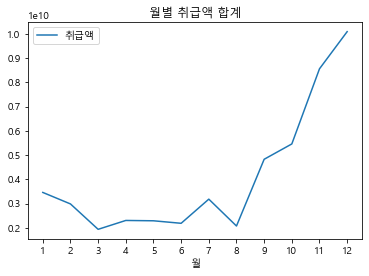

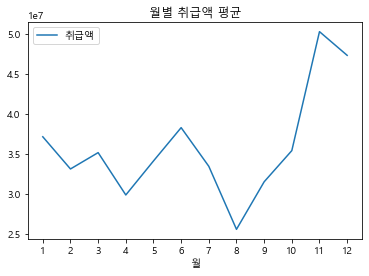

In [13]:
sales_by_month(focus_data)

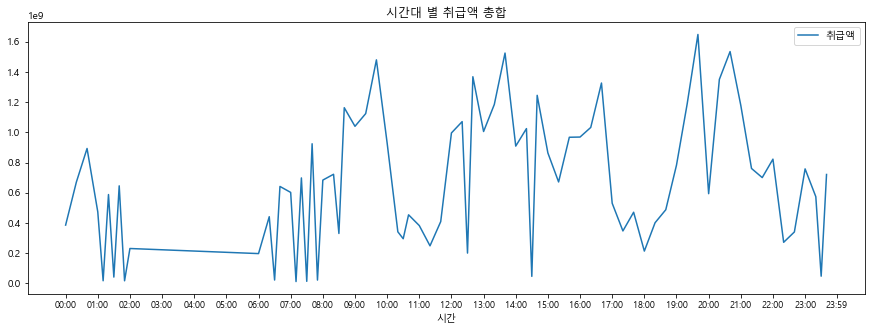

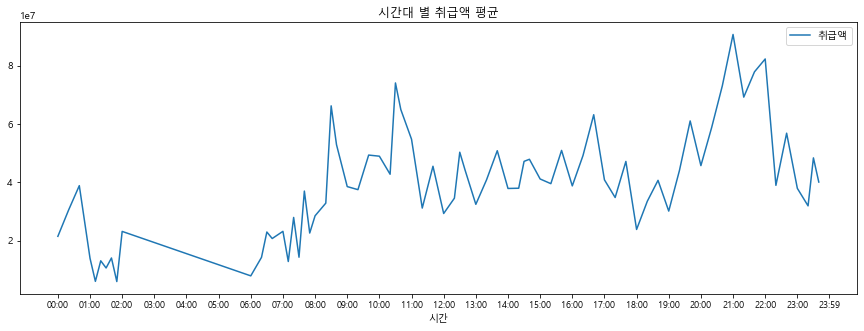

In [14]:
sales_by_time(focus_data)

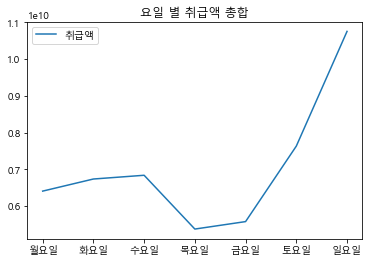

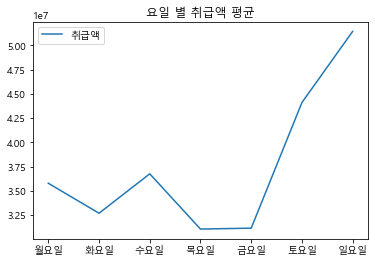

In [15]:
sales_by_yoill(focus_data)

AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절 별 취급액 총합')
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절 별 취급액 평균')


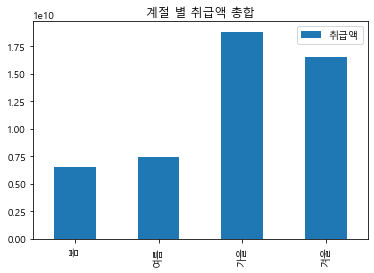

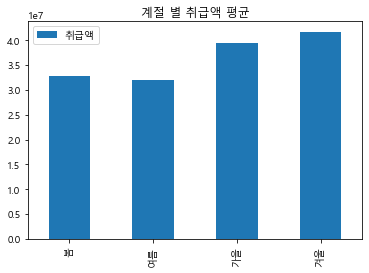

In [16]:
sales_by_season(focus_data)

In [17]:
soldout_by_season(focus_data)

    매진여부
계절      
가을     1
겨울     0
봄      0
여름     0


AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절별 판매단가 총액')
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절별 판매단가 평균')


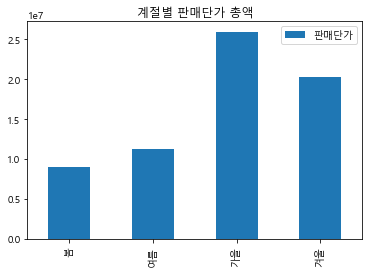

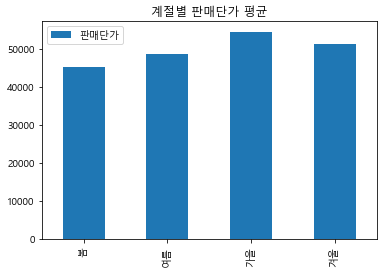

In [18]:
unitprice_by_season(focus_data)

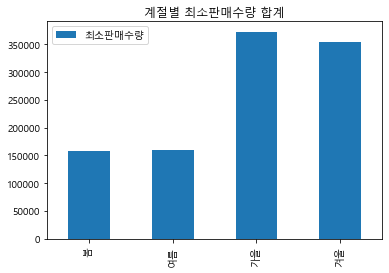

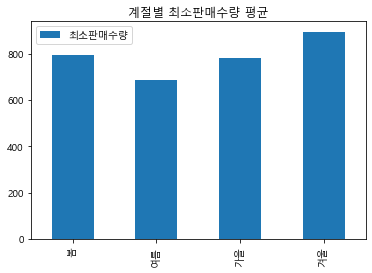

In [19]:
quantity_by_season(focus_data)

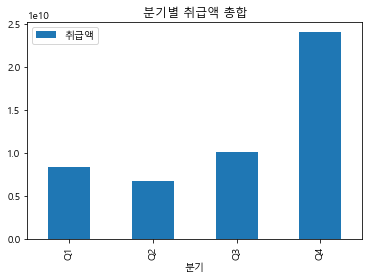

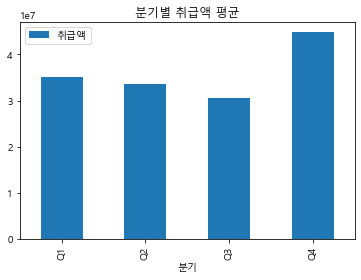

In [20]:
sales_by_Q(focus_data)

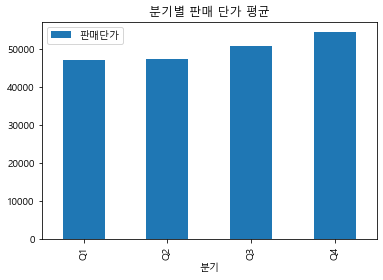

In [21]:
unitprice_by_Q(focus_data)

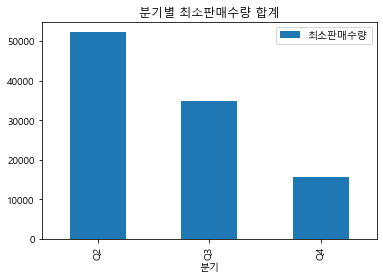

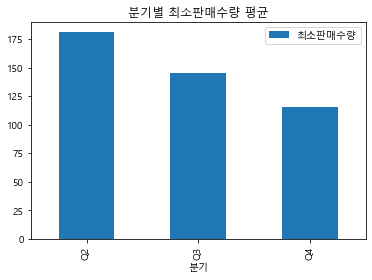

In [26]:
quantity_by_Q(focus_data)